# Clustering Crypto

In [53]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [54]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [55]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.



sorry I took the easy route, pressed for time

In [56]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame

from path import Path
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Preprocessing

In [57]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'

for col in crypto_df.columns: 
    print(col)

Unnamed: 0
CoinName
Algorithm
IsTrading
ProofType
TotalCoinsMined
TotalCoinSupply


In [58]:
# crypto_df = crypto_df.drop(columns = "Unnamed: 0")
# crypto_df
# need to keep "Unnamed: 0" as it's the only identifier. Possibly make it index.

crypto_df.set_index("Unnamed: 0",inplace = True)
crypto_df.index.rename("Coin Symbol", inplace = True)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [59]:
# Keep only cryptocurrencies that are trading

dropping_istrading = crypto_df[crypto_df["IsTrading"] == False].index
crypto_df = crypto_df.drop(index = dropping_istrading)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [60]:
# Keep only cryptocurrencies with a working algorithm

dropping_algorithm = crypto_df[crypto_df["Algorithm"] == "N/A"].index
crypto_df = crypto_df.drop(index = dropping_algorithm)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [61]:
# Remove the "IsTrading" column

crypto_df = crypto_df.drop(columns = "IsTrading")
crypto_df.tail()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,,
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [62]:
# Remove rows with at least 1 null value

crypto_df = crypto_df.dropna()
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [63]:
# Remove rows with cryptocurrencies having no coins mined
dropping_totalcoinsmined = crypto_df[crypto_df["TotalCoinsMined"] == 0].index
crypto_df = crypto_df.drop(index = dropping_totalcoinsmined)
crypto_df.tail()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,,
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [64]:
# Drop rows where there are 'N/A' text values

crypto_df = crypto_df[crypto_df != "N/A"]

In [65]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df

coins_name = crypto_df["CoinName"]
coins_name.head()

Coin Symbol
42        42 Coin
404       404Coin
1337    EliteCoin
BTC       Bitcoin
ETH      Ethereum
Name: CoinName, dtype: object

In [66]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm

crypto_df = crypto_df.drop(columns = "CoinName")
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Coin Symbol,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [67]:
# Create dummy variables for text features

crypto_binary_encoded= pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
crypto_binary_encoded.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Coin Symbol,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Standardize data

crypto_scaled = StandardScaler().fit_transform(crypto_binary_encoded)
crypto_scaled

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

### Reducing Dimensions Using PCA

In [69]:
# Use PCA to reduce dimensions to 3 principal components

pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.34287465,  0.96781324, -0.57308866],
       [-0.32633301,  0.96808237, -0.57365694],
       [ 2.30685026,  1.65160637, -0.63063821],
       ...,
       [ 0.33221742, -2.29647947,  0.43220758],
       [-0.16267308, -2.00002498,  0.30786407],
       [-0.32246845,  0.80256293, -0.31199959]])

In [70]:
# Create a DataFrame with the principal components data

pcs_df= pd.DataFrame(data=crypto_pca, columns=["PC1", "PC2", "PC3"], index= crypto_df.index)
pcs_df.head()

,PC1,PC2,PC3
Coin Symbol,,,
42,-0.342875,0.967813,-0.573089
404,-0.326333,0.968082,-0.573657
1337,2.306850,1.651606,-0.630638
BTC,-0.132308,-1.293690,0.237687
ETH,-0.146398,-2.050880,0.423759


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [71]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot

elbow_data = {"k": k, "intertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="intertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (intertia)

Running K-Means with `k=<your best value for k here>`

In [97]:
# Initialize the K-Means model

model = KMeans(n_clusters=4, random_state=0)

# Fit the model

model.fit(pcs_df)

# Predict clusters

predictions = model.predict(pcs_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([coins_name, crypto_df, pcs_df], axis = 1, join = "inner")
clustered_df["Class"] = predictions

In [88]:
clustered_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,Class
Coin Symbol,,,,,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.342875,0.967813,-0.573089,1
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.326333,0.968082,-0.573657,1
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2.306850,1.651606,-0.630638,1
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.132308,-1.293690,0.237687,0
ETH,Ethereum,Ethash,PoW,1.076842e+08,0,-0.146398,-2.050880,0.423759,0


### Visualizing Results

#### 3D-Scatter with Clusters

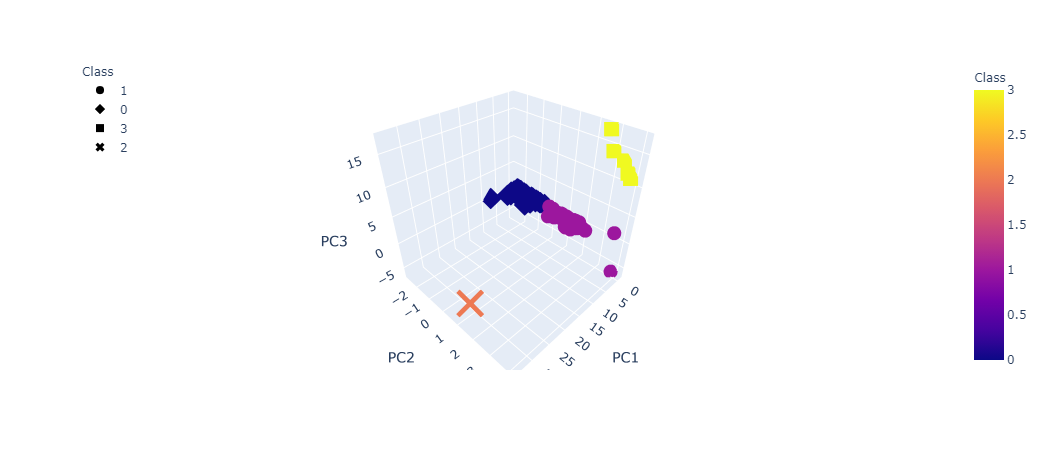

In [89]:
# Create a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name="CoinName",
    hover_data=["Algorithm"]
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [90]:
# Table with tradable cryptos

tradable_cryptos = clustered_df.drop(columns = ["PC1", "PC2", "PC3"])
tradable_cryptos.hvplot.table()

:Table   [CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class]

In [82]:
# Print the total number of tradable cryptocurrencies

len(clustered_df)

533

#### Scatter Plot with Tradable Cryptocurrencies

In [99]:
# Scale data to create the scatter plot

tradable_cryptos["TotalCoinsMined"] = tradable_cryptos["TotalCoinsMined"] / 1000
tradable_cryptos.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Class
Coin Symbol,,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e-08,42,1
404,404Coin,Scrypt,PoW/PoS,1.055185e+00,532000000,1
1337,EliteCoin,X13,PoW/PoS,2.927942e+01,314159265359,1
BTC,Bitcoin,SHA-256,PoW,1.792717e-02,21000000,0
ETH,Ethereum,Ethash,PoW,1.076842e-01,0,0


In [100]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"

tradable_cryptos.hvplot.scatter( 
    x= "TotalCoinsMined", 
    y= "TotalCoinSupply", 
    color = "Class",  
    hover_cols=["CoinName"]
)

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,Class,CoinName)